In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df= pd.read_csv(r"D:\DEPAUL\OTHER\PROJECTS\Gait analysis\Dataset\Gait_analysis.csv")
#df.head(50)

In [2]:
#filling missing values using imputer
#handling nan values
missing_counts=df.isnull().sum()
print(missing_counts[missing_counts > 0])

#replacing NAN value
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # Use 5 nearest neighbors
X_imputed = imputer.fit_transform(df)  # Returns a NumPy array

df = pd.DataFrame(X_imputed, columns=df.columns)  # Convert back to DataFrame

c= df.isnull().sum() 
print(c[c>0])

111    1
dtype: int64
Series([], dtype: int64)


In [ ]:
#df.to_csv("Gait_analysis_cleaned.csv", index=False)

In [3]:

X = df.drop(columns=['Person_ID'])  
Y = df['Person_ID']



CHECKING MULTICOLINEARITY AND CORRELATION

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = X.corr()

# Set correlation threshold (absolute value)
corr_threshold = 0.85  # Adjust if needed

# Filter only highly correlated features
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            high_corr_features.add(corr_matrix.columns[i])
            high_corr_features.add(corr_matrix.columns[j])

# Convert set to list
high_corr_features = list(high_corr_features)

print(f"✅ Selected {len(high_corr_features)} Highly Correlated Features (>|{corr_threshold}|):")
print(high_corr_features)


✅ Selected 212 Highly Correlated Features (>|0.85|):
['19', '26', '15', '95', '157', '63', '230', '205', '285', '172', '149', '260', '51', '146', '133', '97', '38', '148', '280', '184', '204', '279', '1', '53', '214', '36', '200', '93', '180', '235', '295', '216', '29', '176', '257', '156', '92', '123', '283', '8', '269', '288', '308', '115', '27', '190', '169', '264', '60', '139', '59', '47', '86', '104', '7', '291', '24', '227', '274', '141', '122', '300', '159', '20', '266', '110', '116', '143', '187', '162', '151', '229', '224', '296', '220', '312', '191', '173', '177', '223', '261', '83', '34', '37', '178', '35', '154', '16', '254', '199', '82', '221', '6', '45', '105', '298', '107', '0', '50', '85', '167', '262', '5', '217', '208', '318', '32', '121', '113', '88', '273', '111', '287', '252', '170', '304', '134', '10', '219', '276', '158', '91', '189', '319', '109', '23', '253', '171', '258', '271', '153', '102', '281', '150', '87', '250', '320', '236', '166', '218', '278', '14', 

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Compute VIF for all features
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Set VIF threshold (e.g., >5 indicates moderate multicollinearity)
vif_threshold = 5
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()

print(f"✅ Selected {len(high_vif_features)} Features with High VIF (>{vif_threshold}):")
print(high_vif_features)

# Display only the high-VIF features
print("🔍 High VIF Features:")
print(vif_data[vif_data["VIF"] > vif_threshold].sort_values(by="VIF", ascending=False))



d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


✅ Selected 321 Features with High VIF (>5):
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '

BASIC MODEL ACCURACY


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report  # ✅ Import classification_report

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = RandomForestClassifier(max_depth=10, min_samples_leaf= 1, min_samples_split=2, n_estimators=300)
model3 = RandomForestClassifier(
    max_depth=5,                # Restrict depth to prevent memorization
    min_samples_split=5,        # Require at least 5 samples to split a node
    min_samples_leaf=3,         # Require at least 3 samples per leaf
    n_estimators=200,           # Reduce the number of trees to 200 (avoid excessive complexity)
    random_state=42
)

# Split dataset into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Initialize the Random Forest model
#model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)
# Make predictions on the test set
Y_pred_m1 = model1.predict(X_test)
Y_pred_m2 = model2.predict(X_test)
Y_pred_m3 = model3.predict(X_test)

# Print classification accuracy

accuracy_m1 = accuracy_score(Y_test, Y_pred_m1)
print(f"Classification Accuracy: {accuracy_m1:.2f}")

accuracy_m2 = accuracy_score(Y_test, Y_pred_m2)
print(f"Classification Accuracy: {accuracy_m2:.2f}")

accuracy_m3 = accuracy_score(Y_test, Y_pred_m3)
print(f"Classification Accuracy: {accuracy_m3:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_m1))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_m2))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_m3))


Classification Accuracy: 0.70
Classification Accuracy: 0.70
Classification Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         3.0       0.00      0.00      0.00         0
         4.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         1
         8.0       0.00      0.00      0.00         3
         9.0       1.00      1.00      1.00         1
        12.0       1.00      1.00      1.00         1
        13.0       1.00      1.00      1.00         1
        14.0       1.00      1.00      1.00         1

    accuracy                           0.70        10
   macro avg       0.78      0.78      0.78        10
weighted avg       0.70      0.70      0.70        10


Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.00      0.00      0.00   

d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [7]:
#feature selection


#variance threshold

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.02)  # Remove features with very low variance
X_selected = selector.fit_transform(X)

#Recursuve feature elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=75, step=10)  # Select top 50 features
X_selected = selector.fit_transform(X, Y)
X_selected = pd.DataFrame(X_selected, columns=X.columns[selector.support_])  # Keep only selected feature names




Applying PCA to the dataset to reduce dimensionality and compare PCA, RFE and original dataset

In [8]:
from sklearn.decomposition import PCA
X = df.drop(columns=['Person_ID'])  
Y = df['Person_ID']

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# 1. Original Dataset
print("Training on Original Dataset...")
model_original = RandomForestClassifier(random_state=42)
model_original.fit(X_train, Y_train)
Y_pred_original = model_original.predict(X_test)
print("Accuracy (Original):", accuracy_score(Y_test, Y_pred_original))
print(classification_report(Y_test, Y_pred_original))

# 2. PCA-Transformed Data
print("\nTraining on PCA-Transformed Data...")
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, Y_train)
Y_pred_pca = model_pca.predict(X_test_pca)
print("Accuracy (PCA):", accuracy_score(Y_test, Y_pred_pca))
print(classification_report(Y_test, Y_pred_pca))
      

# 3. RFE-Selected Features
print("\nTraining on RFE-Selected Features...")
model_rfe = RandomForestClassifier(random_state=42)
selector = RFE(model_rfe, n_features_to_select=75, step=10)  # Select top 50 features
X_train_rfe = selector.fit_transform(X_train, Y_train)
X_test_rfe = selector.transform(X_test)

model_rfe_selected = RandomForestClassifier(random_state=42)
model_rfe_selected.fit(X_train_rfe, Y_train)
Y_pred_rfe = model_rfe_selected.predict(X_test_rfe)
print("Accuracy (RFE):", accuracy_score(Y_test, Y_pred_rfe))
print(classification_report(Y_test, Y_pred_rfe))

# Cross-Validation for Robust Comparison
print("\nCross-Validation Results:")
datasets = {
    "Original": X_scaled,
    "PCA": pca.transform(X_scaled),
    "RFE": selector.transform(X_scaled)
}

for name, data in datasets.items():
    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, data, Y, cv=2, scoring='accuracy')
    print(f"{name} - Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


print("Accuracy (Original):", accuracy_score(Y_test, Y_pred_original))
print("Accuracy (PCA):", accuracy_score(Y_test, Y_pred_pca))
print("Accuracy (RFE):", accuracy_score(Y_test, Y_pred_rfe))




Training on Original Dataset...
Accuracy (Original): 0.7
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         3.0       0.00      0.00      0.00         0
         4.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         1
         8.0       0.00      0.00      0.00         3
         9.0       1.00      1.00      1.00         1
        12.0       1.00      1.00      1.00         1
        13.0       1.00      1.00      1.00         1
        14.0       1.00      1.00      1.00         1

    accuracy                           0.70        10
   macro avg       0.78      0.78      0.78        10
weighted avg       0.70      0.70      0.70        10


Training on PCA-Transformed Data...
Accuracy (PCA): 0.5
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         0
         4.0      

d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

Accuracy (RFE): 0.7
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.00      0.00      0.00         0
         4.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         1
         8.0       0.00      0.00      0.00         3
         9.0       1.00      1.00      1.00         1
        12.0       1.00      1.00      1.00         1
        13.0       1.00      1.00      1.00         1
        14.0       1.00      1.00      1.00         1

    accuracy                           0.70        10
   macro avg       0.78      0.78      0.78        10
weighted avg       0.70      0.70      0.70        10


Cross-Validation Results:
Original - Cross-Validation Accuracy: 0.7917 ± 0.0000


d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

PCA - Cross-Validation Accuracy: 0.4167 ± 0.0000
RFE - Cross-Validation Accuracy: 0.9792 ± 0.0208
Accuracy (Original): 0.7
Accuracy (PCA): 0.5
Accuracy (RFE): 0.7


PCA is not increasing the accuracy, RFE and basic model has same accuracy but RFE has better cross validation accuracy than others


MODELS ON RFE FEATURES

In [9]:

# Define features and target
X = X_selected   # Features
Y = df['Person_ID']  # Target variable

# Split dataset into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Initialize the Random Forest model
#model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)
# Make predictions on the test set
Y_pred_m1 = model1.predict(X_test)
Y_pred_m2 = model2.predict(X_test)
Y_pred_m3 = model3.predict(X_test)

# Print classification accuracy

accuracy_m1 = accuracy_score(Y_test, Y_pred_m1)
print(f"Classification Accuracy: {accuracy_m1:.2f}")

accuracy_m2 = accuracy_score(Y_test, Y_pred_m2)
print(f"Classification Accuracy: {accuracy_m2:.2f}")

accuracy_m3 = accuracy_score(Y_test, Y_pred_m3)
print(f"Classification Accuracy: {accuracy_m3:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_m1))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_m2))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_m3))


Classification Accuracy: 0.70
Classification Accuracy: 0.70
Classification Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         1
         8.0       0.00      0.00      0.00         3
         9.0       1.00      1.00      1.00         1
        12.0       1.00      1.00      1.00         1
        13.0       1.00      1.00      1.00         1
        14.0       1.00      1.00      1.00         1

    accuracy                           0.70        10
   macro avg       0.70      0.70      0.70        10
weighted avg       0.70      0.70      0.70        10


Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00   

d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

FEATURE IMPORTANCE OF RFE FEATURE MODELS

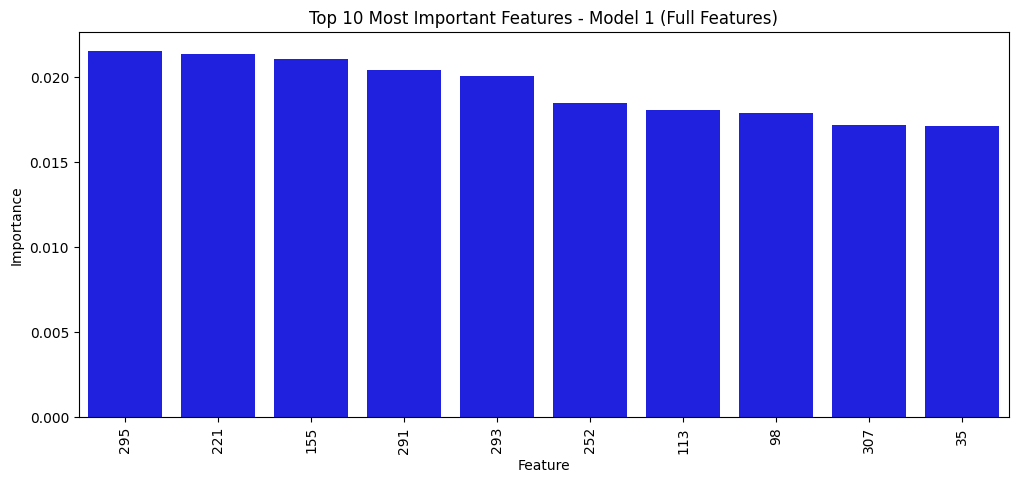

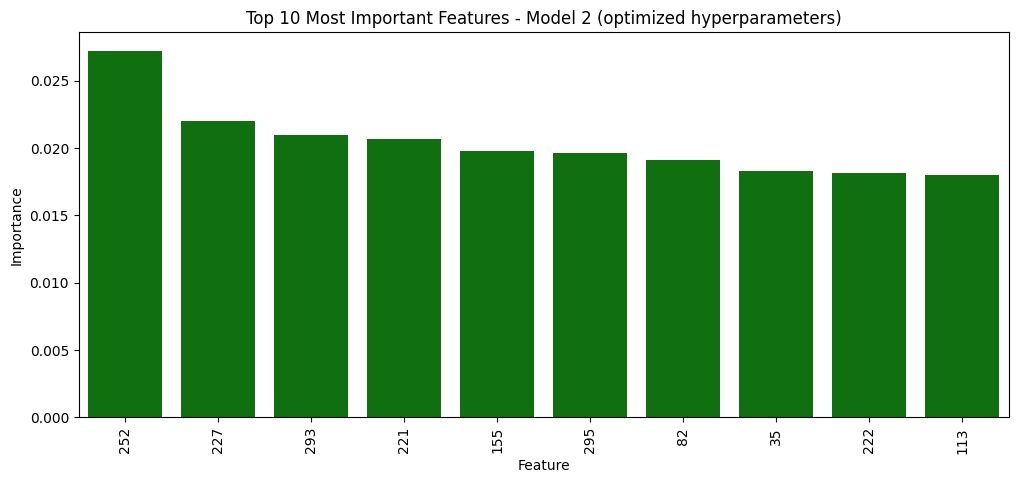

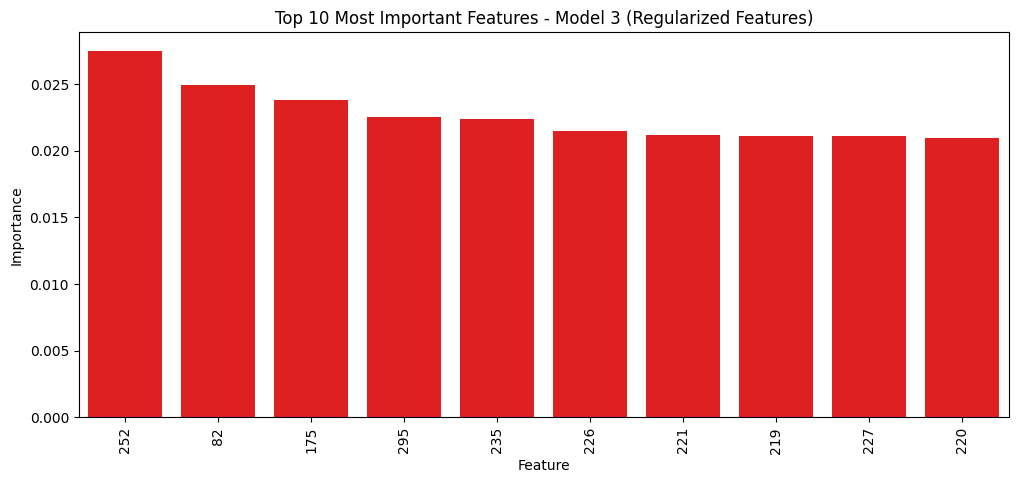

In [10]:
# Feature Importances
feature_importances_m1 = model1.feature_importances_
feature_importances_m2 = model2.feature_importances_
feature_importances_m3 = model3.feature_importances_

# Sort features by importance for all models
sorted_indices_m1 = np.argsort(feature_importances_m1)[::-1]
sorted_indices_m2 = np.argsort(feature_importances_m2)[::-1]
sorted_indices_m3 = np.argsort(feature_importances_m3)[::-1]

# Select top 10 features
top_features_m1 = np.array(X.columns)[sorted_indices_m1[:10]]
top_importances_m1 = feature_importances_m1[sorted_indices_m1[:10]]

top_features_m2 = np.array(X.columns)[sorted_indices_m2[:10]]
top_importances_m2 = feature_importances_m2[sorted_indices_m2[:10]]

top_features_m3 = np.array(X.columns)[sorted_indices_m3[:10]]
top_importances_m3 = feature_importances_m3[sorted_indices_m3[:10]]

# Plot Feature Importances
plt.figure(figsize=(12, 5))
sns.barplot(x=top_features_m1, y=top_importances_m1, color="blue")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Most Important Features - Model 1 (Full Features)")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_features_m2, y=top_importances_m2, color="green")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Most Important Features - Model 2 (optimized hyperparameters)")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_features_m3, y=top_importances_m3, color="red")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Most Important Features - Model 3 (Regularized Features)")
plt.show()




COMMON FEATURES IN RFE MODELS

In [11]:
# Find common features among the top 10 features of all three models
common_features = set(top_features_m1) & set(top_features_m2) & set(top_features_m3)

# Convert to DataFrame for display
common_features_df = pd.DataFrame({"Common Features": list(common_features)})

# Display the common features
print("Common Features in All Models:")
print(common_features_df)

Common Features in All Models:
  Common Features
0             221
1             252
2             295


PERFORMING LOO CROSS VALIDATION

Average Accuracy with Model 1: 0.9583 ± 0.1998
Average Accuracy with Model 2: 0.9583 ± 0.1998
Average Accuracy with Model 3: 0.8125 ± 0.3903


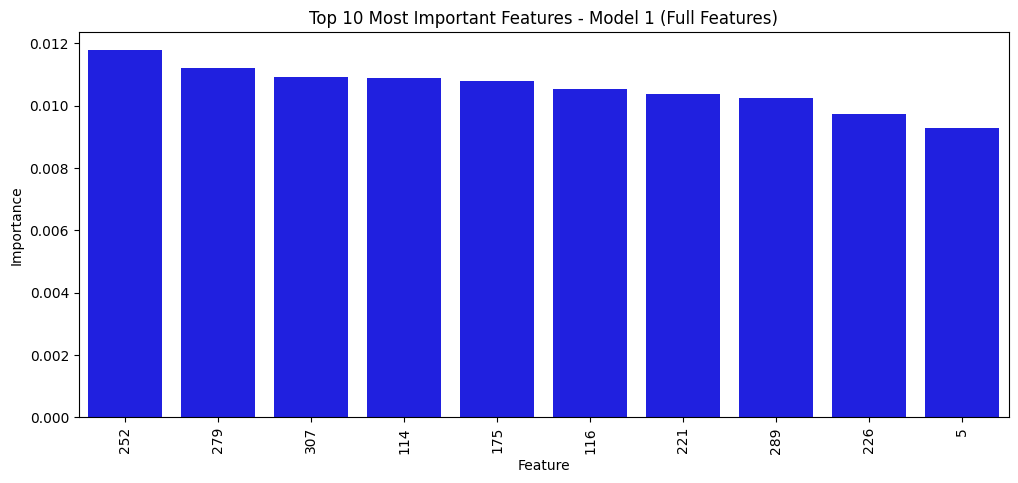

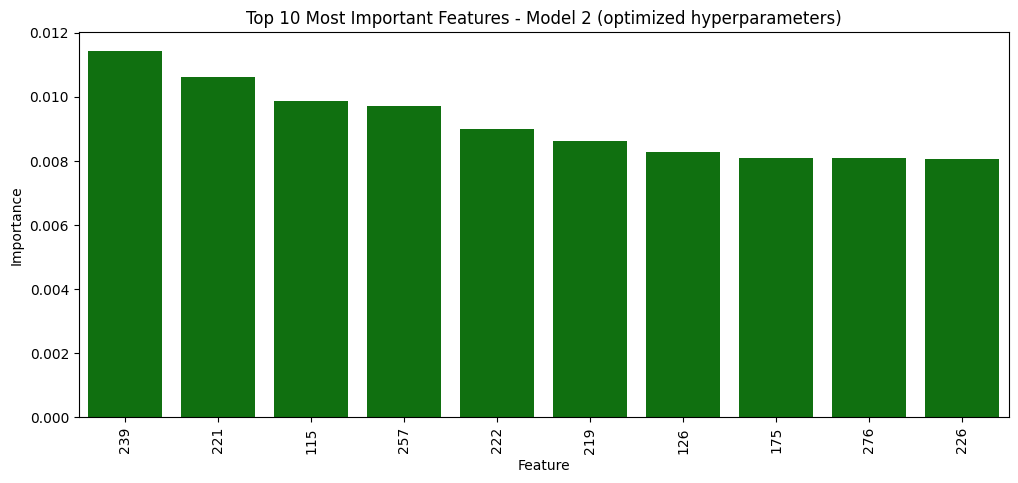

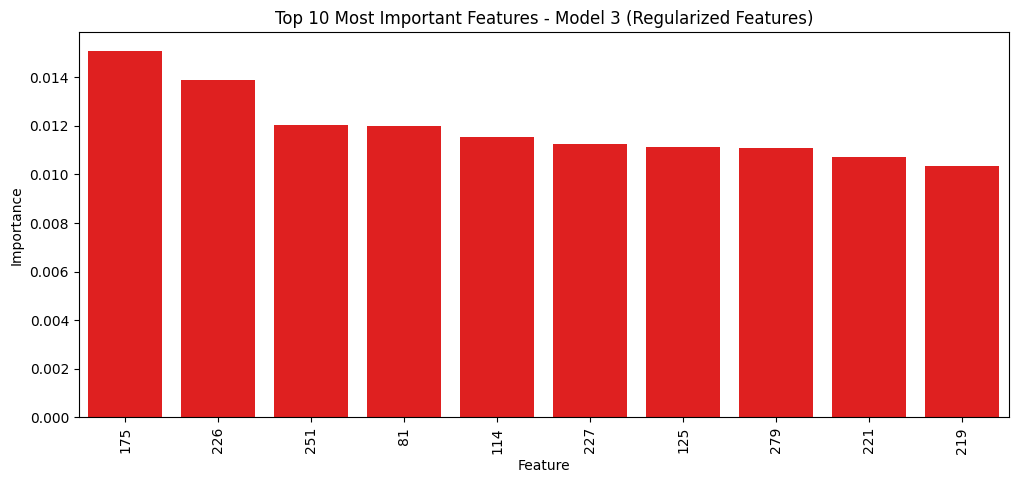

In [12]:
from sklearn.model_selection import LeaveOneOut 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df.drop(columns=['Person_ID'])  
Y = df['Person_ID']

# Initialize Leave-One-Out CV
loo = LeaveOneOut()

# Store accuracy scores
scores_m1 = []
scores_m2 = []
scores_m3 = []

# Perform LOO Cross-Validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Initialize Models
    model1 = RandomForestClassifier(n_estimators=100, random_state=42)
    model2 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
    model3 = RandomForestClassifier(
        max_depth=5, min_samples_split=5, min_samples_leaf=3, n_estimators=200, random_state=42
    )

    # Train models
    model1.fit(X_train, Y_train)
    model2.fit(X_train, Y_train)
    model3.fit(X_train, Y_train)

    # Predict
    Y_pred_m1 = model1.predict(X_test)
    Y_pred_m2 = model2.predict(X_test)
    Y_pred_m3 = model3.predict(X_test)

    # Store accuracy scores
    scores_m1.append(accuracy_score(Y_test, Y_pred_m1))
    scores_m2.append(accuracy_score(Y_test, Y_pred_m2))
    scores_m3.append(accuracy_score(Y_test, Y_pred_m3))

# Print final results
print(f"Average Accuracy with Model 1: {np.mean(scores_m1):.4f} ± {np.std(scores_m1):.4f}")
print(f"Average Accuracy with Model 2: {np.mean(scores_m2):.4f} ± {np.std(scores_m2):.4f}")
print(f"Average Accuracy with Model 3: {np.mean(scores_m3):.4f} ± {np.std(scores_m3):.4f}")

# Feature Importances
feature_importances_m1 = model1.feature_importances_
feature_importances_m2 = model2.feature_importances_
feature_importances_m3 = model3.feature_importances_

# Sort features by importance for all models
sorted_indices_m1 = np.argsort(feature_importances_m1)[::-1]
sorted_indices_m2 = np.argsort(feature_importances_m2)[::-1]
sorted_indices_m3 = np.argsort(feature_importances_m3)[::-1]

# Select top 10 features
top_features_m1 = np.array(X.columns)[sorted_indices_m1[:10]]
top_importances_m1 = feature_importances_m1[sorted_indices_m1[:10]]

top_features_m2 = np.array(X.columns)[sorted_indices_m2[:10]]
top_importances_m2 = feature_importances_m2[sorted_indices_m2[:10]]

top_features_m3 = np.array(X.columns)[sorted_indices_m3[:10]]
top_importances_m3 = feature_importances_m3[sorted_indices_m3[:10]]

# Plot Feature Importances
plt.figure(figsize=(12, 5))
sns.barplot(x=top_features_m1, y=top_importances_m1, color="blue")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Most Important Features - Model 1 (Full Features)")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_features_m2, y=top_importances_m2, color="green")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Most Important Features - Model 2 (optimized hyperparameters)")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_features_m3, y=top_importances_m3, color="red")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Most Important Features - Model 3 (Regularized Features)")
plt.show()


COMMON FEATURES IN ALL MODELS

In [13]:
# Find common features among the top 10 features of all three models
common_features = set(top_features_m1) & set(top_features_m2) & set(top_features_m3)

# Convert to DataFrame for display
common_features_df = pd.DataFrame({"Common Features": list(common_features)})

# Display the common features
print("Common Features in All Models:")
print(common_features_df)

Common Features in All Models:
  Common Features
0             221
1             226
2             175


Average Accuracy with Model 1: 0.9583 ± 0.1998
Average Accuracy with Model 2: 0.9583 ± 0.1998
Average Accuracy with Model 3: 0.8125 ± 0.3903

MAIN ISSUE WITH LOO : The model sees a person’s data in training (2 out of 3 times), it might just memorize it instead of generalizing well.

GROUPED K-FOLD

Instead of randomly splitting records, group them by Person_ID, so that:

Each fold has completely different individuals.
The model is tested on data from unseen Person_IDs, ensuring better generalization.

In [14]:
from sklearn.model_selection import GroupKFold

X = X_selected  
Y = df['Person_ID']

# Define Group K-Fold (ensures each person is only in one fold)
gkf = GroupKFold(n_splits=3)

# Store accuracy scores for all models
scores_m1 = []  # Model 1 (Baseline)
scores_m2 = []  # Model 2 (Optimized Hyperparameters)
scores_m3 = []  # Model 3 (Regularized)

# Perform Grouped k-Fold Cross-Validation
for train_index, test_index in gkf.split(X, Y, groups=df["Person_ID"]):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Initialize Models
    model1 = RandomForestClassifier(n_estimators=100, random_state=42)  # Baseline
    model2 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300)  # Optimized Hyperparameters
    model3 = RandomForestClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=3, n_estimators=200, random_state=42)  # Regularized

    # Train models
    model1.fit(X_train, Y_train)
    model2.fit(X_train, Y_train)
    model3.fit(X_train, Y_train)

    # Predict
    Y_pred_m1 = model1.predict(X_test)
    Y_pred_m2 = model2.predict(X_test)
    Y_pred_m3 = model3.predict(X_test)

    # Store accuracy scores
    scores_m1.append(accuracy_score(Y_test, Y_pred_m1))
    scores_m2.append(accuracy_score(Y_test, Y_pred_m2))
    scores_m3.append(accuracy_score(Y_test, Y_pred_m3))

# Print final results
print(f"Grouped k-Fold CV Accuracy - Model 1 (Baseline): {np.mean(scores_m1):.4f} ± {np.std(scores_m1):.4f}")
print(f"Grouped k-Fold CV Accuracy - Model 2 (Optimized): {np.mean(scores_m2):.4f} ± {np.std(scores_m2):.4f}")
print(f"Grouped k-Fold CV Accuracy - Model 3 (Regularized): {np.mean(scores_m3):.4f} ± {np.std(scores_m3):.4f}")


Grouped k-Fold CV Accuracy - Model 1 (Baseline): 0.0000 ± 0.0000
Grouped k-Fold CV Accuracy - Model 2 (Optimized): 0.0000 ± 0.0000
Grouped k-Fold CV Accuracy - Model 3 (Regularized): 0.0000 ± 0.0000


print(X_train.head())


In [15]:
# Check Person_IDs in each train/test set
for train_index, test_index in gkf.split(X, Y, groups=df["Person_ID"]):
    print("Train Person_IDs:", df.iloc[train_index]["Person_ID"].unique())
    print("Test Person_IDs:", df.iloc[test_index]["Person_ID"].unique())
    print("-" * 50)


Train Person_IDs: [ 1.  2.  4.  5.  7.  8. 10. 11. 13. 14.]
Test Person_IDs: [ 0.  3.  6.  9. 12. 15.]
--------------------------------------------------
Train Person_IDs: [ 0.  1.  3.  4.  6.  7.  9. 10. 12. 13. 15.]
Test Person_IDs: [ 2.  5.  8. 11. 14.]
--------------------------------------------------
Train Person_IDs: [ 0.  2.  3.  5.  6.  8.  9. 11. 12. 14. 15.]
Test Person_IDs: [ 1.  4.  7. 10. 13.]
--------------------------------------------------


The models are learning person-specific patterns (since Person_ID has only 3 records per individual).

In Grouped k-Fold CV, the test set contains completely new Person_IDs, meaning the model has never seen those individuals before.

The model is failing to generalize to unseen Person_IDs, leading to 100% misclassification (0% accuracy).

STRATIFIED K-FOLD

In [16]:
from sklearn.model_selection import StratifiedKFold

# Define Stratified K-Fold (ensures balanced distribution)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Store accuracy scores
scores_m1 = []
scores_m2 = []
scores_m3 = []

# Perform Stratified k-Fold Cross-Validation
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Initialize Models
    model1 = RandomForestClassifier(n_estimators=100, random_state=42)
    model2 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
    model3 = RandomForestClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=3, n_estimators=200, random_state=42)

    # Train models
    model1.fit(X_train, Y_train)
    model2.fit(X_train, Y_train)
    model3.fit(X_train, Y_train)

    # Predict
    Y_pred_m1 = model1.predict(X_test)
    Y_pred_m2 = model2.predict(X_test)
    Y_pred_m3 = model3.predict(X_test)

    # Store accuracy scores
    scores_m1.append(accuracy_score(Y_test, Y_pred_m1))
    scores_m2.append(accuracy_score(Y_test, Y_pred_m2))
    scores_m3.append(accuracy_score(Y_test, Y_pred_m3))

# Print final results
print(f"Stratified k-Fold CV Accuracy - Model 1 (Baseline): {np.mean(scores_m1):.4f} ± {np.std(scores_m1):.4f}")
print(f"Stratified k-Fold CV Accuracy - Model 2 (Optimized): {np.mean(scores_m2):.4f} ± {np.std(scores_m2):.4f}")
print(f"Stratified k-Fold CV Accuracy - Model 3 (Regularized): {np.mean(scores_m3):.4f} ± {np.std(scores_m3):.4f}")


Stratified k-Fold CV Accuracy - Model 1 (Baseline): 0.9792 ± 0.0295
Stratified k-Fold CV Accuracy - Model 2 (Optimized): 0.9792 ± 0.0295
Stratified k-Fold CV Accuracy - Model 3 (Regularized): 1.0000 ± 0.0000


HOLD OUT ACCURACY

In [17]:
from sklearn.model_selection import train_test_split

# Ensure the dataset is shuffled properly before splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=df["Person_ID"], random_state=42)

# Initialize models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
model3 = RandomForestClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=3, n_estimators=200, random_state=42)

# Train models
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)

# Predict
Y_pred_m1 = model1.predict(X_test)
Y_pred_m2 = model2.predict(X_test)
Y_pred_m3 = model3.predict(X_test)

# Print accuracy
print(f"Holdout Test Accuracy - Model 1 (Baseline): {accuracy_score(Y_test, Y_pred_m1):.4f}")
print(f"Holdout Test Accuracy - Model 2 (Optimized): {accuracy_score(Y_test, Y_pred_m2):.4f}")
print(f"Holdout Test Accuracy - Model 3 (Regularized): {accuracy_score(Y_test, Y_pred_m3):.4f}")


Holdout Test Accuracy - Model 1 (Baseline): 1.0000
Holdout Test Accuracy - Model 2 (Optimized): 1.0000
Holdout Test Accuracy - Model 3 (Regularized): 1.0000


Shuffle Labels Test for All Models

In [18]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Shuffle X_train and Y_train TOGETHER (important!)
X_train_shuffled, Y_train_shuffled = shuffle(X_train, Y_train, random_state=42)

# Initialize models (same as before)
model1_shuffled = RandomForestClassifier(n_estimators=100, random_state=42)
model2_shuffled = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
model3_shuffled = RandomForestClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=3, n_estimators=200, random_state=42)

# Train models on shuffled labels
model1_shuffled.fit(X_train_shuffled, Y_train_shuffled)
model2_shuffled.fit(X_train_shuffled, Y_train_shuffled)
model3_shuffled.fit(X_train_shuffled, Y_train_shuffled)

# Predict on test set
Y_pred_m1_shuffled = model1_shuffled.predict(X_test)
Y_pred_m2_shuffled = model2_shuffled.predict(X_test)
Y_pred_m3_shuffled = model3_shuffled.predict(X_test)

# Check accuracy
shuffled_accuracy_m1 = accuracy_score(Y_test, Y_pred_m1_shuffled)
shuffled_accuracy_m2 = accuracy_score(Y_test, Y_pred_m2_shuffled)
shuffled_accuracy_m3 = accuracy_score(Y_test, Y_pred_m3_shuffled)

print(f"🚨 Accuracy with Shuffled Labels - Model 1 (Baseline): {shuffled_accuracy_m1:.4f}")
print(f"🚨 Accuracy with Shuffled Labels - Model 2 (Optimized): {shuffled_accuracy_m2:.4f}")
print(f"🚨 Accuracy with Shuffled Labels - Model 3 (Regularized): {shuffled_accuracy_m3:.4f}")


🚨 Accuracy with Shuffled Labels - Model 1 (Baseline): 1.0000
🚨 Accuracy with Shuffled Labels - Model 2 (Optimized): 1.0000
🚨 Accuracy with Shuffled Labels - Model 3 (Regularized): 1.0000


Check for Features That Perfectly Correlate with Person_ID|

In [19]:
import pandas as pd

# Compute correlation of each feature with Person_ID
correlations = X.corrwith(Y)

# Print features with high correlation
print("🔍 Features with High Correlation to `Person_ID`:")
print(correlations[abs(correlations) > 0.9])  # Show features with very high correlation


🔍 Features with High Correlation to `Person_ID`:
Series([], dtype: float64)


In [20]:
unique_counts = X.nunique()
print("🔍 Features That Are Unique for Every Record:")
print(unique_counts[unique_counts == X.shape[0]])  # Features that are unique for every row


🔍 Features That Are Unique for Every Record:
20     48
84     48
100    48
113    48
116    48
146    48
163    48
164    48
177    48
191    48
204    48
227    48
248    48
dtype: int64


In [21]:
# Convert train and test sets to DataFrames
train_df = pd.DataFrame(X_train)
test_df = pd.DataFrame(X_test)

# Check for overlap
overlap = train_df.merge(test_df, how='inner')
print(f"🔍 Number of Overlapping Records in Train & Test: {overlap.shape[0]}")


🔍 Number of Overlapping Records in Train & Test: 0


CONFIRMING STRATIFIED CV ACCURACY